In [1]:
%matplotlib inline

In [2]:
"""
Tanapat 
PopQuants
Created : 21/03/2020
"""

import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='colorblind')
%matplotlib inline

'''
รายชื่อ กองทุน etf ราย sector ขนาดใหญ่ของอเมริกา

HealthCare                   = xlv

ConsumerDiscretionary        = xly

Technology                   = xlk

ConsumerStaples              = xlp

Utilities                    = xlu

Financial                    = xlf

Industrial                   = xli

Energy                       = xle

BasicMaterials               = xlb

iShares MSCI Thailand Capped = thd
'''

In [3]:
sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary', 'thd':'MSCI Thailand'}


Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb','thd']    


start = '2020/1/1'
end = '2020/03/20'

Price = web.get_data_yahoo(Symbol,start=start,end=end)

In [4]:
Price = Price['Adj Close'].rename(sector_name, axis='columns')
daily_returns = Price.pct_change().dropna()

In [5]:
daily_returns

Symbols,HealthCare,ConsumerDiscretionary,Technology,ConsumerStaples,Utilities,Financial,Industrial,Energy,BasicMaterials,MSCI Thailand
Date,,,,,,,,,,
2020-01-02,0.002651,0.011880,0.018763,-0.007939,-0.012535,0.009747,0.018903,0.008994,-0.011723,0.011644
2020-01-03,-0.008714,-0.008510,-0.011243,-0.001600,0.002037,-0.010618,-0.001928,-0.002971,-0.016145,-0.013428
2020-01-06,0.006223,0.002782,0.002383,0.002084,0.000938,-0.000650,0.000362,0.007781,-0.004354,-0.010294
2020-01-07,-0.001963,-0.001585,-0.000432,-0.007679,-0.001406,-0.006508,-0.002051,-0.002629,-0.001177,-0.001849
2020-01-08,0.006492,0.003016,0.010700,0.003708,-0.000469,0.006551,0.003385,-0.016472,0.003536,-0.010420
2020-01-09,0.004300,0.005302,0.011336,0.007067,0.005479,0.006183,0.004217,0.007369,0.003691,0.006786
2020-01-10,0.000292,-0.005432,-0.002326,-0.000638,0.002647,-0.007439,-0.007079,-0.005653,-0.004012,0.007554
2020-01-13,-0.003502,0.003166,0.012507,0.006543,0.006056,0.006843,0.008218,0.000334,0.012924,0.003345
2020-01-14,0.006052,-0.000316,-0.004711,0.000317,0.002933,-0.001942,0.000120,0.000167,-0.004143,-0.008737


Text(0.5,1,'5 Year Sector Correation')

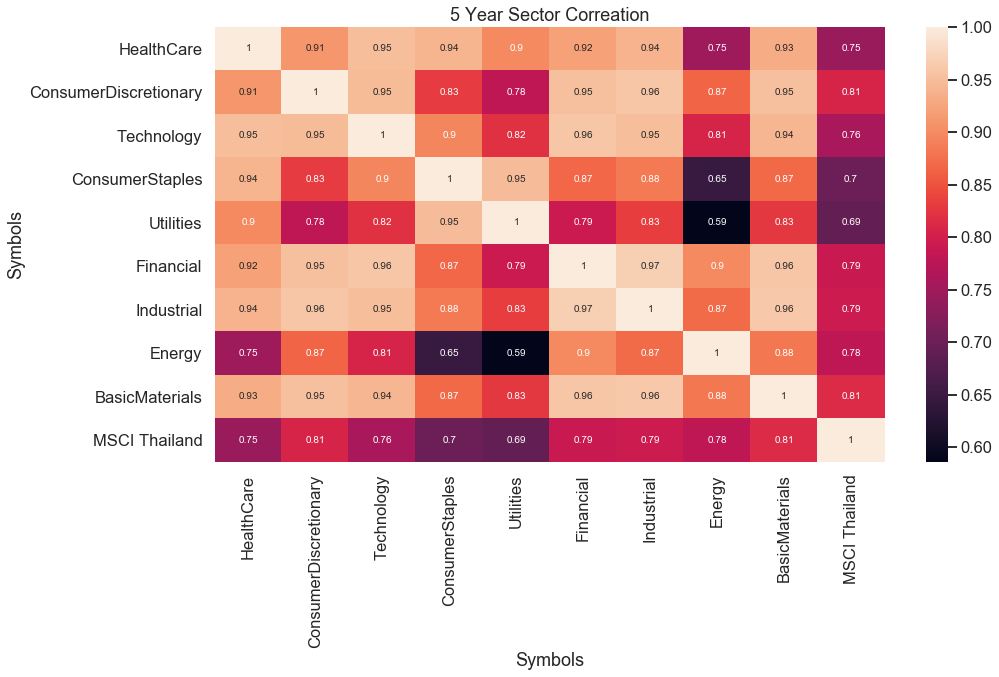

In [6]:
# calculate the correlation matrix
corr = daily_returns.corr()

# plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, ).set_title("5 Year Sector Correation")

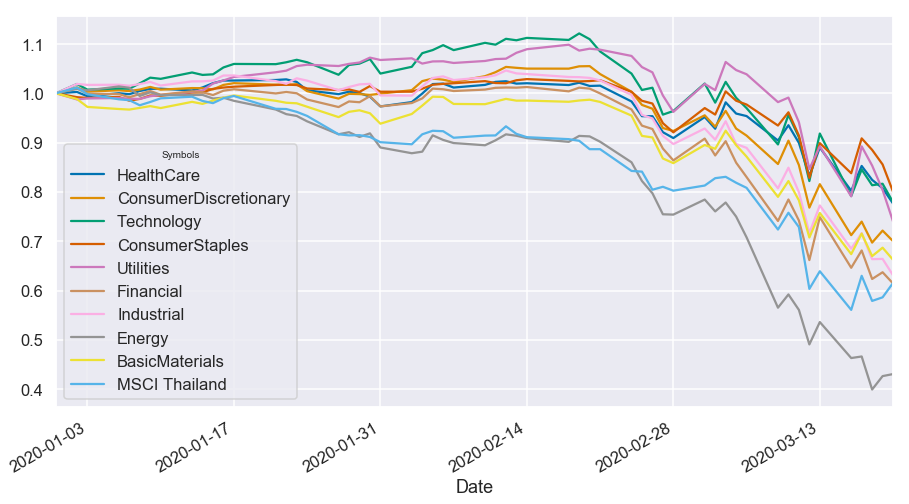

In [7]:
etf_return = Price.apply(lambda x: x / x[0])
etf_return.plot(figsize=(15,8))

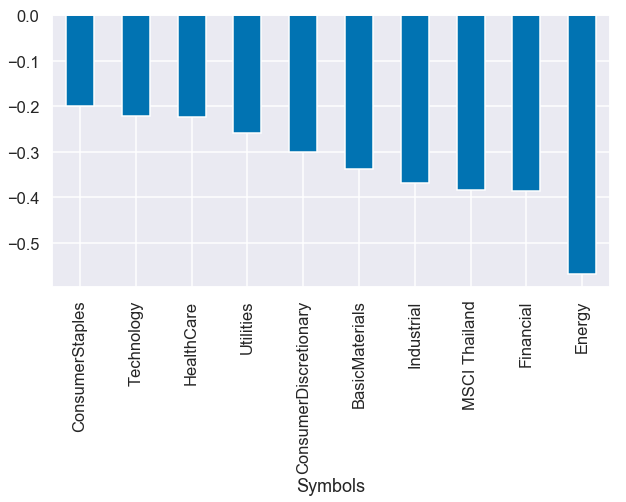

In [8]:
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(10,5))

Text(0.5,1,'Correation with iShares MSCI Thailand')

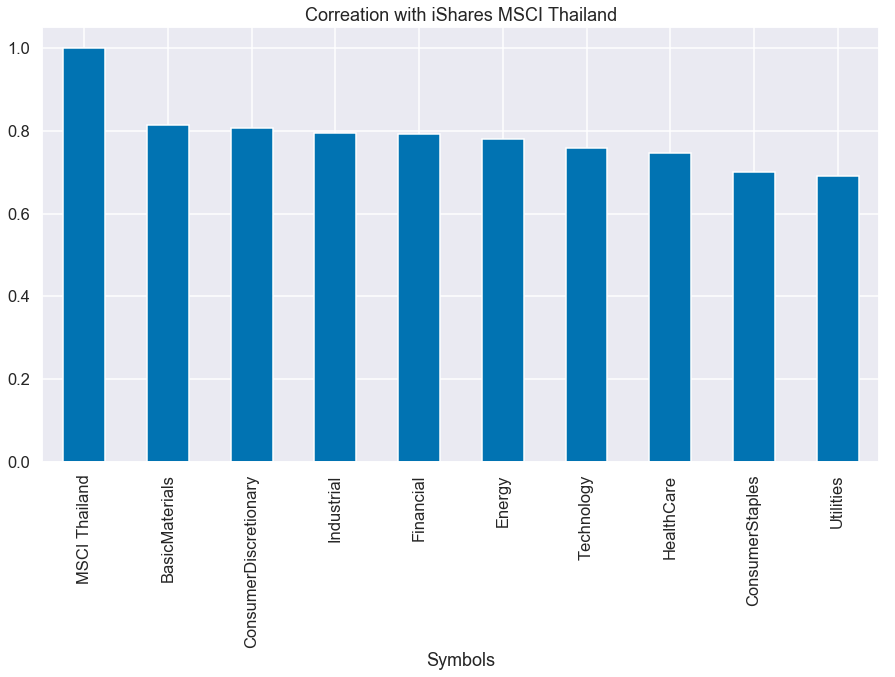

In [9]:
#ความสัมพันธ์กับ set
corr.iloc[-1,0:].sort_values(ascending = False).plot.bar(figsize=(15,8)).set_title("Correation with iShares MSCI Thailand")

In [10]:
etf_return.iloc[-1]

Symbols
HealthCare               0.776458
ConsumerDiscretionary    0.700128
Technology               0.779099
ConsumerStaples          0.800254
Utilities                0.740019
Financial                0.614360
Industrial               0.630907
Energy                   0.430713
BasicMaterials           0.662325
MSCI Thailand            0.615411
Name: 2020-03-20 00:00:00, dtype: float64

/Users/tanapat/opt/anaconda3/envs/finno/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


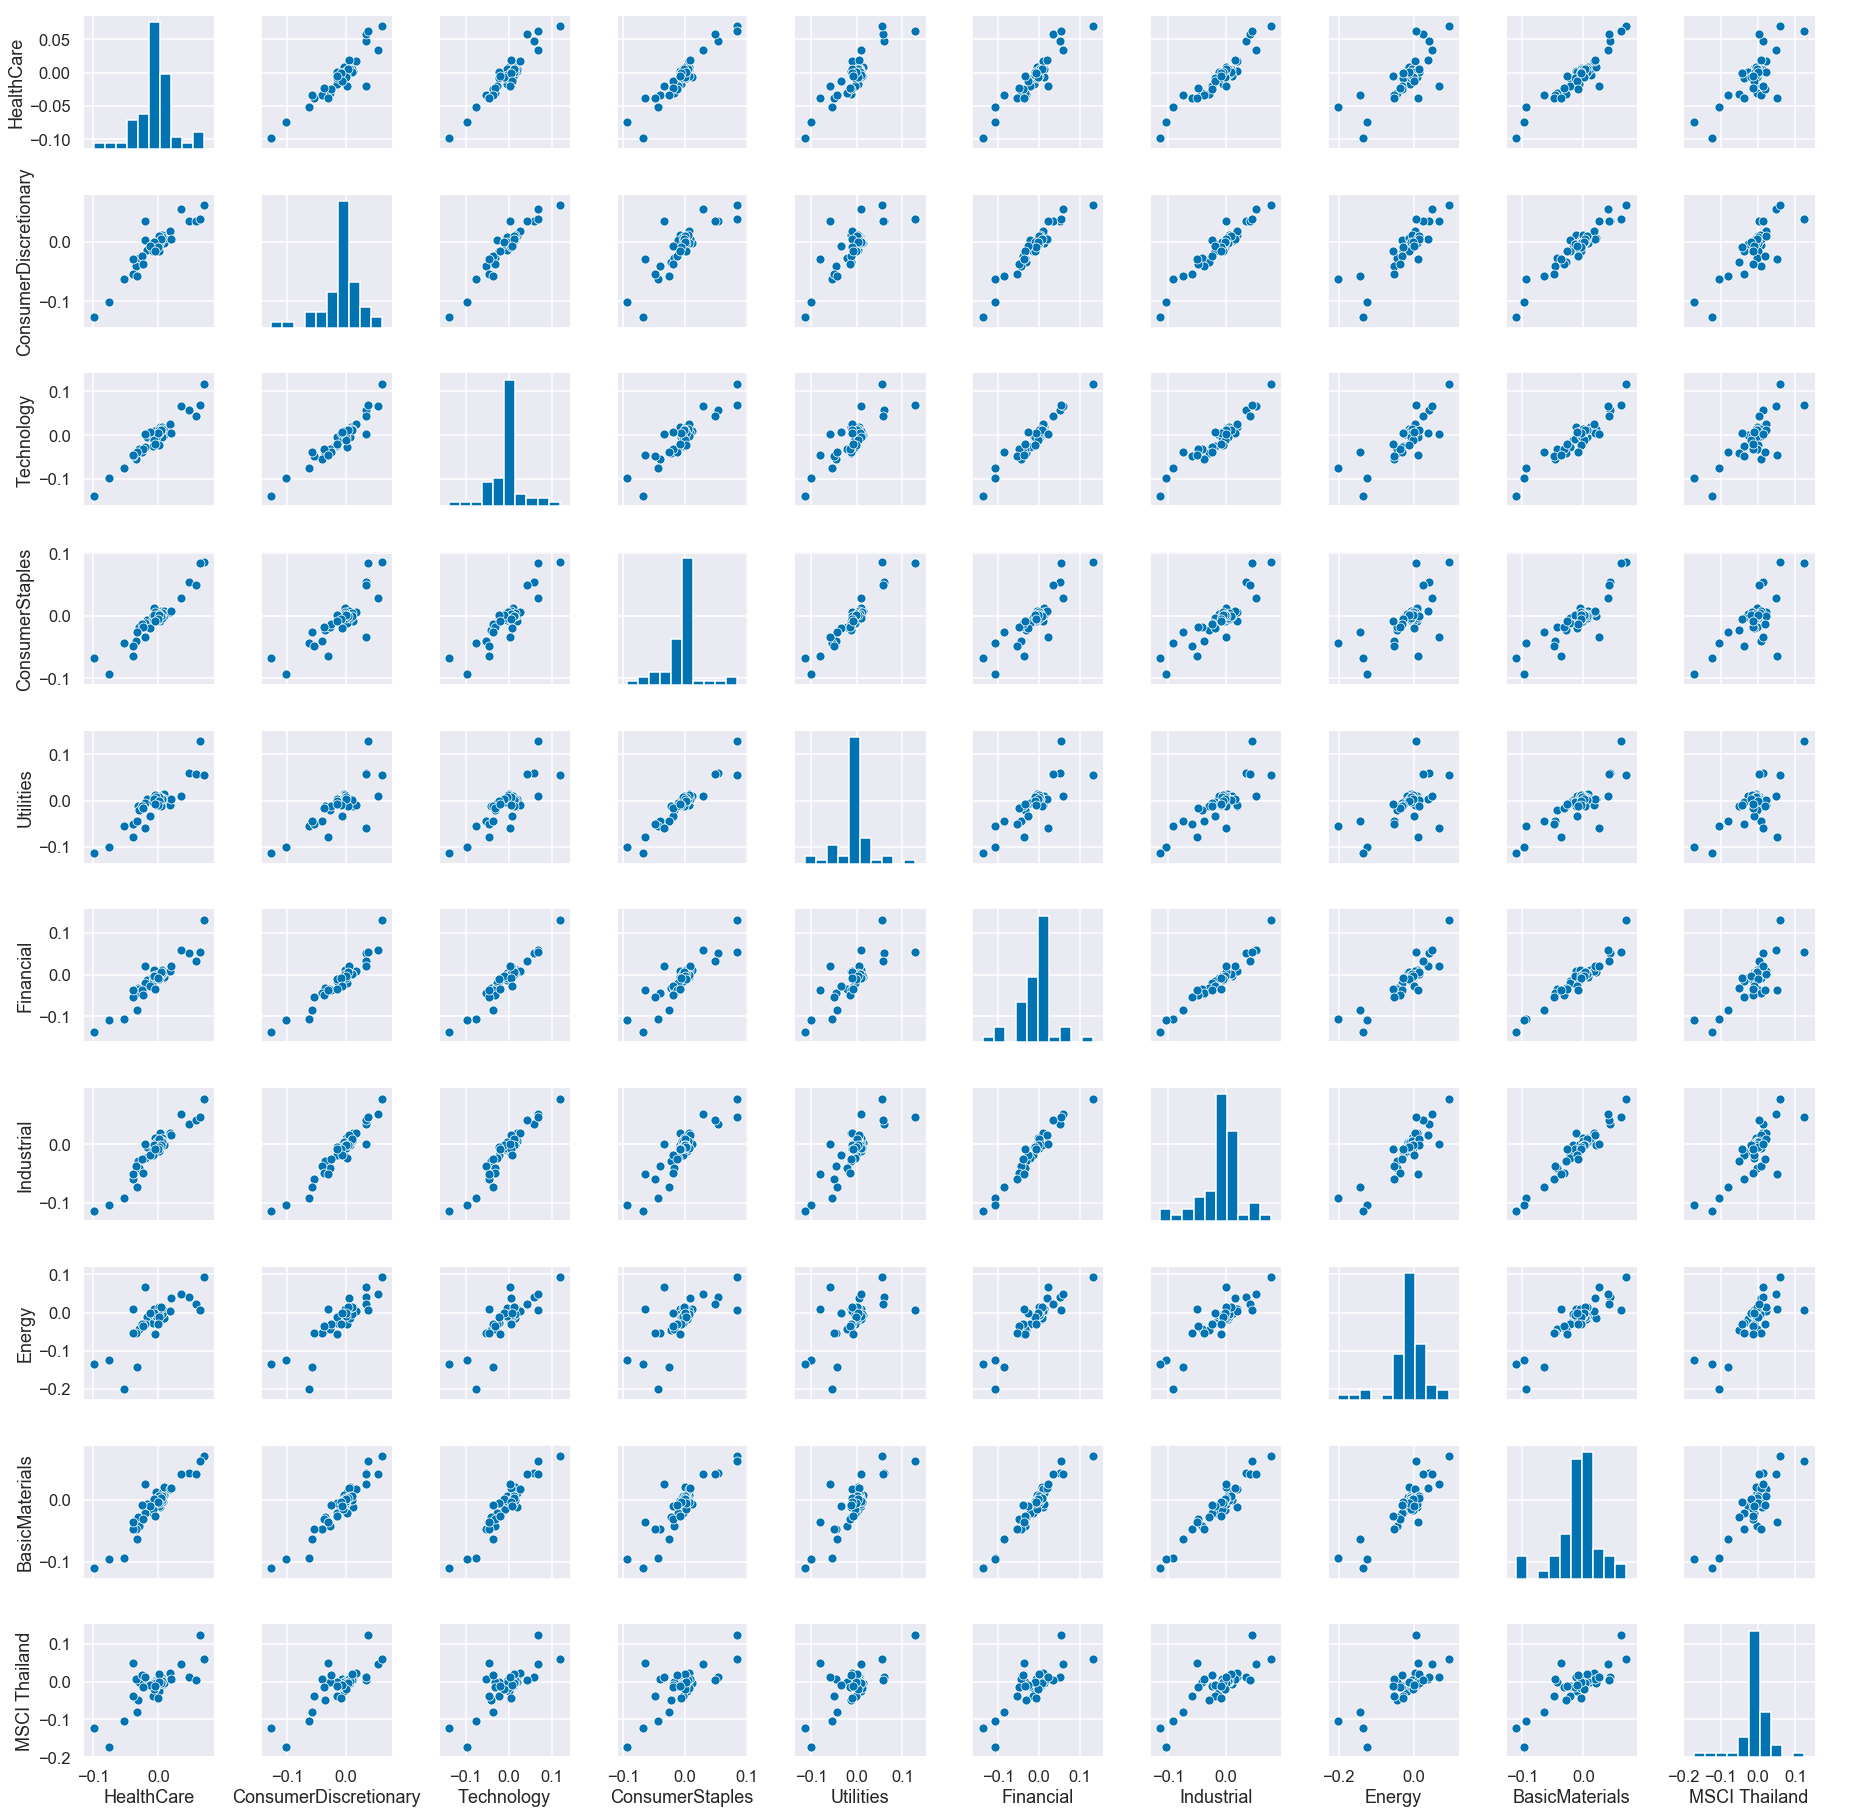

In [11]:
etf_pairplot = sns.pairplot(daily_returns, size=2.5)